<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#Plot-parameters" data-toc-modified-id="Plot-parameters-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Plot parameters</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Sigma-sweep" data-toc-modified-id="Sigma-sweep-0.2.0.1"><span class="toc-item-num">0.2.0.1&nbsp;&nbsp;</span>Sigma sweep</a></span></li><li><span><a href="#Plot-success-vs-sigma" data-toc-modified-id="Plot-success-vs-sigma-0.2.0.2"><span class="toc-item-num">0.2.0.2&nbsp;&nbsp;</span>Plot success vs sigma</a></span></li><li><span><a href="#Find-success-rate" data-toc-modified-id="Find-success-rate-0.2.0.3"><span class="toc-item-num">0.2.0.3&nbsp;&nbsp;</span>Find success rate</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Calibrating-the-calculation-of-the-rate" data-toc-modified-id="Calibrating-the-calculation-of-the-rate-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calibrating the calculation of the rate</a></span><ul class="toc-item"><li><span><a href="#Dependence-on-the-remove" data-toc-modified-id="Dependence-on-the-remove-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dependence on the remove</a></span></li><li><span><a href="#Dependence-on-the-cue" data-toc-modified-id="Dependence-on-the-cue-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dependence on the cue</a></span></li></ul></li><li><span><a href="#General-calculations" data-toc-modified-id="General-calculations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>General calculations</a></span><ul class="toc-item"><li><span><a href="#The-function-to-adjust" data-toc-modified-id="The-function-to-adjust-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The function to adjust</a></span></li><li><span><a href="#The-variance-for-different-values-of-p-and-n-(samples)" data-toc-modified-id="The-variance-for-different-values-of-p-and-n-(samples)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The variance for different values of p and n (samples)</a></span></li><li><span><a href="#Confidence-intervals" data-toc-modified-id="Confidence-intervals-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Confidence intervals</a></span></li><li><span><a href="#Fitting-a-curve" data-toc-modified-id="Fitting-a-curve-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Fitting a curve</a></span><ul class="toc-item"><li><span><a href="#A-simple-example" data-toc-modified-id="A-simple-example-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>A simple example</a></span></li><li><span><a href="#How-many-samples-we-need-for-estimation" data-toc-modified-id="How-many-samples-we-need-for-estimation-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>How many samples we need for estimation</a></span></li><li><span><a href="#Fix-the-number-of-samples-in-time-but-increase-the-quality-of-them" data-toc-modified-id="Fix-the-number-of-samples-in-time-but-increase-the-quality-of-them-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Fix the number of samples in time but increase the quality of them</a></span></li></ul></li><li><span><a href="#Fitting-in-certain-parts-of-logistic-function" data-toc-modified-id="Fitting-in-certain-parts-of-logistic-function-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Fitting in certain parts of logistic function</a></span></li></ul></li></ul></div>

# Preamble

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 10)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)
sns.set_style("whitegrid", {'axes.grid': False})

from network import Protocol, NetworkManager, Network
from patterns_representation import PatternsRepresentation
from analysis_functions import calculate_persistence_time, calculate_recall_quantities
from plotting_functions import plot_weight_matrix, plot_network_activity_angle, plot_persistent_matrix

epsilon = 10e-80
vmin = -3.0

## Plot parameters

In [2]:
lw = 8
ms = 15
alpha_graph = 0.3
colors = sns.color_palette()

In [3]:
dt = 0.001

## Functions

#### Sigma sweep

In [4]:
def run_sigma_sweep(sigma_number, samples, sigma_max, manager, T_persistence=0.050, remove=0.005, cue_times=3):

    manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)
    tau_s = manager.nn.tau_s
    T_recall = T_persistence * minicolumns
    T_cue = cue_times * tau_s
    nr = manager.canonical_network_representation
    
    sigma_vector = np.linspace(0, sigma_max, num=sigma_number)
    successes_collection = np.zeros((sigma_number, samples))
    persistent_times_collection = {index: [] for index in range(sigma_number)}
    sequence_collection = {index: [] for index in range(sigma_number)}

    for index, sigma in enumerate(sigma_vector):
        manager.nn.sigma_out = sigma
        manager.nn.sigma_in = sigma * np.sqrt(2 / tau_s)
        for sample in range(samples):
            aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove,
                                              reset=True, empty_history=True)
            success, pattern_sequence, persistent_times, timings = aux
            successes_collection[index, sample] = success
            persistent_times_collection[index].append(persistent_times[:n_patterns])
            sequence_collection[index].append(pattern_sequence)

    results_dic = {'manager': manager, 'sigma_vector': sigma_vector, 'success': successes_collection,
                   'persistent times': persistent_times_collection, 'sequences': sequence_collection,
                   'T_persistence': T_persistence}

    return results_dic

#### Plot success vs sigma

In [5]:
def plot_mean_success_vs_sigma(results_dictionary, index=0, label=0, ax=None):

    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    successes_collection = results_dictionary['success']
    sigma_vector = results_dictionary['sigma_vector']

    std = successes_collection.std(axis=1)
    mean_success = successes_collection.mean(axis=1)
    
    # Plot the mean
    ax.plot(sigma_vector, mean_success, 'o-', lw=lw, ms=ms, color=colors[index], label=label)
    
    # Plot sigma05
    sigma05_arg = np.where(mean_success <= 0.5)[0]
    if sigma05_arg.size > 0:
        sigma05 = sigma_vector[sigma05_arg[0]]
        ax.plot(sigma05, 0.5, '*', ms=(ms + 20), color='black')
    
    # Plot the interval
    low = mean_success - std
    low[low < 0.0] = 0.0
    high = mean_success + std
    ax.fill_between(sigma_vector, low, high, color=colors[index], alpha=alpha_graph)

    ax.axhline(0, ls='--', color='gray')
    ax.axvline(0, ls='--', color='gray')
    ax.set_xlabel(r'$\sigma$')
    ax.set_ylabel('Success')
    ax.legend()

    return ax

#### Find success rate

In [6]:
def find_success_rate(manager, T_recall, n_samples, sigma_out, remove=0.009, n_cue=1.0):
    manager.nn.sigma_in = sigma_out * np.sqrt(2 / tau_s)
    manager.nn.sigma_out = sigma_out
    T_cue = n_cue * manager.nn.tau_s
    I_cue = 0
    nr = manager.canonical_network_representation
    success_list = []
    for index in range(n_samples):
        aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
        success, pattern_sequence, persistent_times, timings = aux
        success_list.append(success)

    return np.mean(success_list)

# Calibrating the calculation of the rate 
The goal of this section is to see how the calculated rate depends on the remove value and number of times we use the tau_s as a cue value (I_cue = n_times * tau_s)

In [33]:
%%time

strict_maximum = True

g_a = 1.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 1.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = minicolumns

# Training protocol
training_time_base = 0.300
training_times = [training_time_base for i in range(n_patterns)]
inter_pulse_interval_base = 0.0
inter_pulse_intervals = [inter_pulse_interval_base for i in range(n_patterns)]
inter_sequence_interval = 0.0
resting_time = 0.0
epochs = 1
T_persistence = 0.050

# Manager properties
values_to_save = ['o']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
             tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
             strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
dt = 0.0001
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)

# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals, inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)

manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)


CPU times: user 172 ms, sys: 28 ms, total: 200 ms
Wall time: 176 ms


In [34]:
%%time
remove = 0.010
n_cue = 1.0
n_samples = 250
T_recall = minicolumns * T_persistence + tau_s
r = find_success_rate(manager, T_recall, n_samples, sigma_out, remove=remove, n_cue=n_cue)

print(r)

0.724
CPU times: user 47.2 s, sys: 92 ms, total: 47.3 s
Wall time: 47.3 s


In [35]:
%%time
dt = 0.001

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)

# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals, inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)

manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)

remove = 0.010
n_cue = 1.0
n_samples = 250
T_recall = minicolumns * T_persistence + tau_s
r = find_success_rate(manager, T_recall, n_samples, sigma_out, remove=remove, n_cue=n_cue)
print(r)

0.86
CPU times: user 6.94 s, sys: 12 ms, total: 6.95 s
Wall time: 6.94 s


## Dependence on the remove

In [11]:
%%time
remove = 0.010
n_cue = 1.0
n_samples = 250
T_recall = minicolumns * T_persistence + tau_s

num = 8
remove_set = np.linspace(0.005, 0.020, num=num)
rate_set = np.zeros(num)

for index, remove in enumerate(remove_set):
    r = find_success_rate(manager, T_recall, n_samples, sigma_out, remove=remove, n_cue=n_cue)
    rate_set[index] = r

CPU times: user 45.4 s, sys: 24 ms, total: 45.4 s
Wall time: 45.5 s


Text(0,0.5,'succcess')

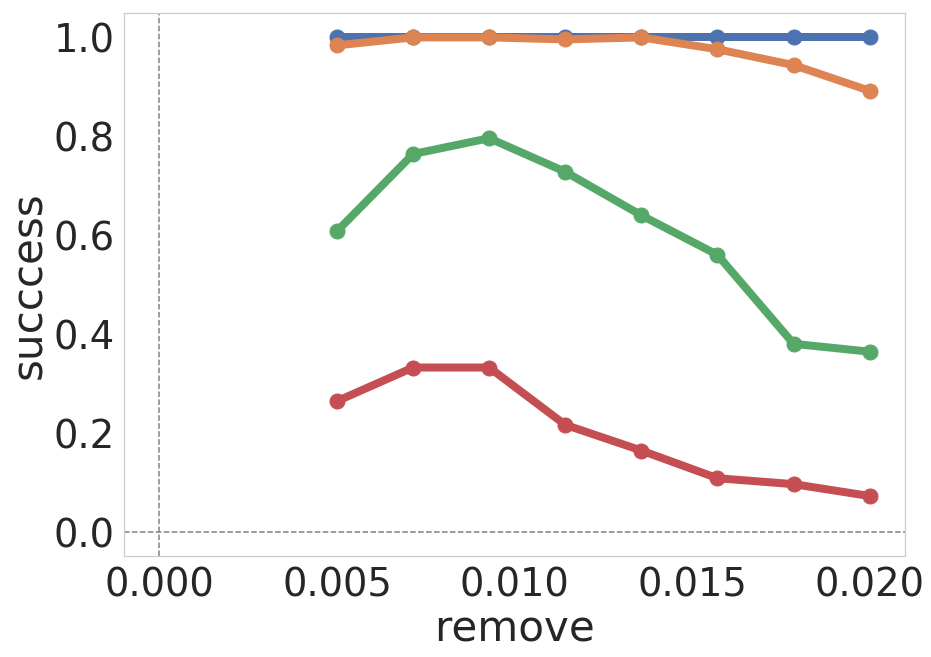

In [15]:
plt.plot(remove_set, rate_set, 'o-', lw=lw, ms=ms)

plt.axhline(0, ls='--', color='gray')
plt.axvline(0, ls='--', color='gray')
plt.xlabel('remove')
plt.ylabel('succcess')

In [13]:
%%time
remove = 0.010
n_cue = 1.0
n_samples = 250
T_recall = minicolumns * T_persistence + tau_s

num = 8
remove_set = np.linspace(0.005, 0.020, num=num)
sigma_out_set = [0.1, 0.5, 1.0, 2.0]
rate_set = np.zeros((num, 4))

for index, remove in enumerate(remove_set):
    print(remove)
    for index2, sigma_out in enumerate(sigma_out_set):
        r = find_success_rate(manager, T_recall, n_samples, sigma_out, remove=remove, n_cue=n_cue)
        rate_set[index, index2] = r

0.005
0.0071428571428571435
0.009285714285714286
0.01142857142857143
0.013571428571428571
0.015714285714285715
0.01785714285714286
0.02
CPU times: user 3min 6s, sys: 28 ms, total: 3min 6s
Wall time: 3min 6s


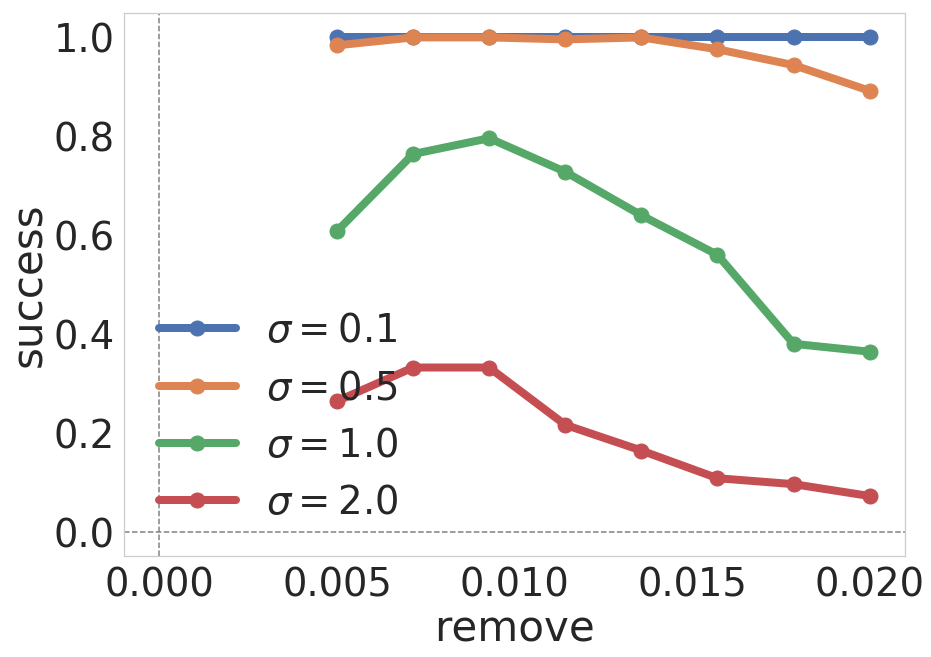

In [14]:
for index, sigma_out in enumerate(sigma_out_set):
    plt.plot(remove_set, rate_set[:, index], 'o-', lw=lw, ms=ms, label=r'$\sigma = $' + str(sigma_out))

plt.axhline(0, ls='--', color='gray')
plt.axvline(0, ls='--', color='gray')

plt.xlabel('remove')
plt.ylabel('success')
plt.legend(frameon=False);

## Dependence on the cue

In [24]:
%%time
sigma_out = 0.5
remove = 0.010
n_cue = 1.0
n_samples = 250
T_recall = minicolumns * T_persistence + tau_s

n_cue_set = np.arange(1, 5, 1)
rate_set = np.zeros(n_cue_set.size)

for index, n_cue in enumerate(n_cue_set):
    r = find_success_rate(manager, T_recall, n_samples, sigma_out, remove=remove, n_cue=n_cue)
    rate_set[index] = r

CPU times: user 27.7 s, sys: 12 ms, total: 27.7 s
Wall time: 27.7 s


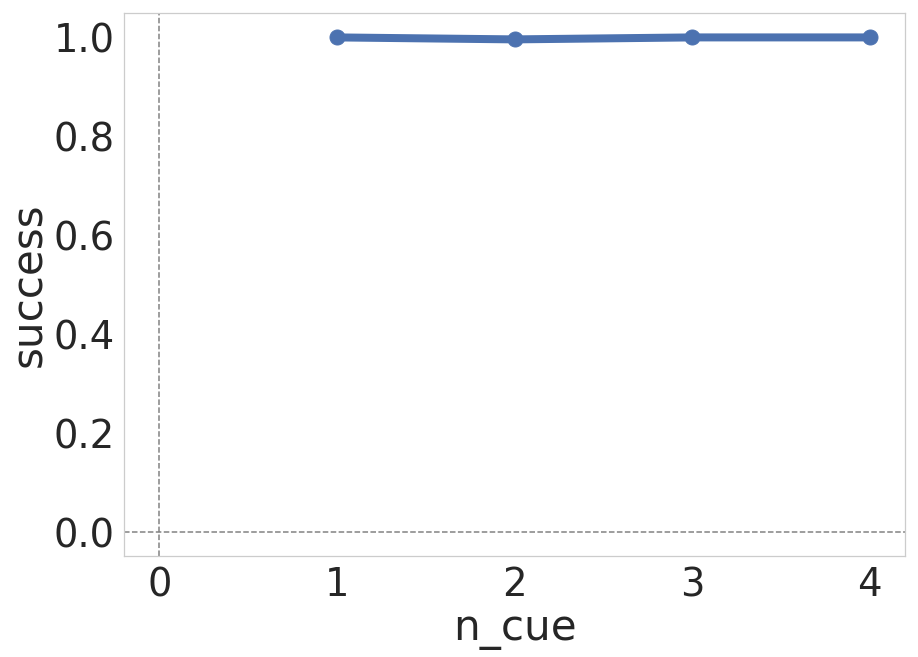

In [25]:
plt.plot(n_cue_set, rate_set, 'o-', lw=lw, ms=ms)

plt.axhline(0, ls='--', color='gray')
plt.axvline(0, ls='--', color='gray')

plt.xlabel('n_cue')
plt.ylabel('success');

In [22]:
%%time
remove = 0.010

n_cue = 1.0
n_samples = 250
T_recall = minicolumns * T_persistence + tau_s

n_cue_set = np.arange(1, 5, 1)
sigma_out_set = [0.1, 0.5, 1.0, 2.0]
rate_set = np.zeros((n_cue_set.size, 4))

for index, n_cue in enumerate(n_cue_set):
    print(n_cue)
    for index2, sigma_out in enumerate(sigma_out_set):
        r = find_success_rate(manager, T_recall, n_samples, sigma_out, remove=remove, n_cue=n_cue)
        rate_set[index, index2] = r

1
2
3
4
CPU times: user 1min 26s, sys: 16 ms, total: 1min 26s
Wall time: 1min 26s


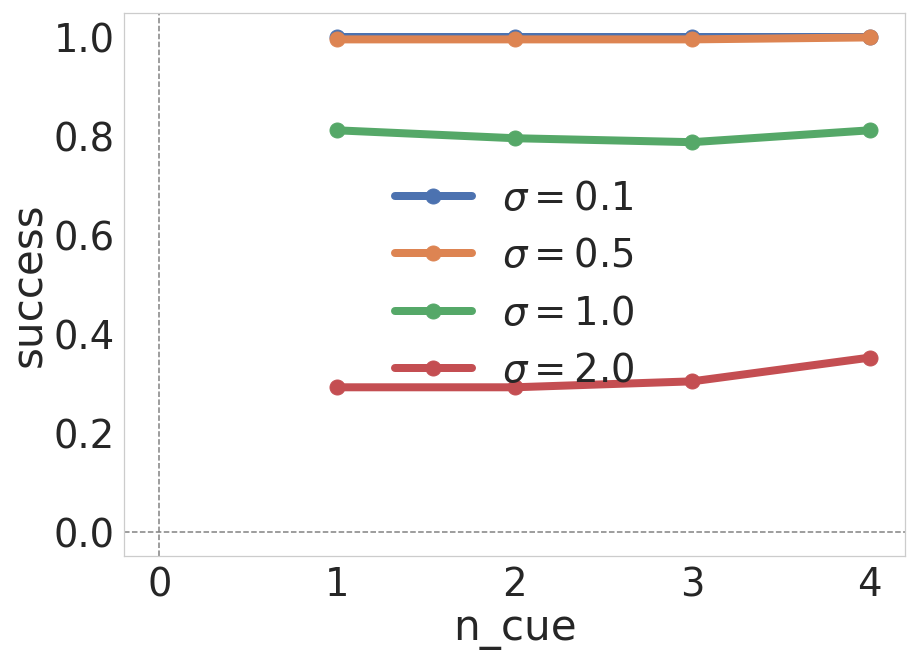

In [23]:
for index, sigma_out in enumerate(sigma_out_set):
    plt.plot(n_cue_set, rate_set[:, index], 'o-', lw=lw, ms=ms, label=r'$\sigma = $' + str(sigma_out))

plt.axhline(0, ls='--', color='gray')
plt.axvline(0, ls='--', color='gray')
plt.xlabel('n_cue')
plt.ylabel('success')
plt.legend(frameon=False)

In [ ]:
%%time

strict_maximum = True

g_a = 1.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 10.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = minicolumns

# Training protocol
training_time_base = 0.300
training_times = [training_time_base for i in range(n_patterns)]
inter_pulse_interval_base = 0.0
inter_pulse_intervals = [inter_pulse_interval_base for i in range(n_patterns)]
inter_sequence_interval = 0.0
resting_time = 0.0
epochs = 1
T_persistence = 0.050

# Manager properties
values_to_save = ['o']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
             tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
             strict_maximum=strict_maximum, perfect=False, normalized_currents=True)

dt = 0.001

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)

# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals, inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)

manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)

remove = 0.010
n_cue = 1.0
n_samples = 25
T_recall = minicolumns * T_persistence + tau_s
r = find_success_rate(manager, T_recall, n_samples, sigma_out, remove=remove, n_cue=n_cue)

# General calculations

## The function to adjust

In [288]:
def return_sigmoid(x, k, sigma05):
    
    return 1.0 / (1 + np.exp(-k * (x - sigma05)))

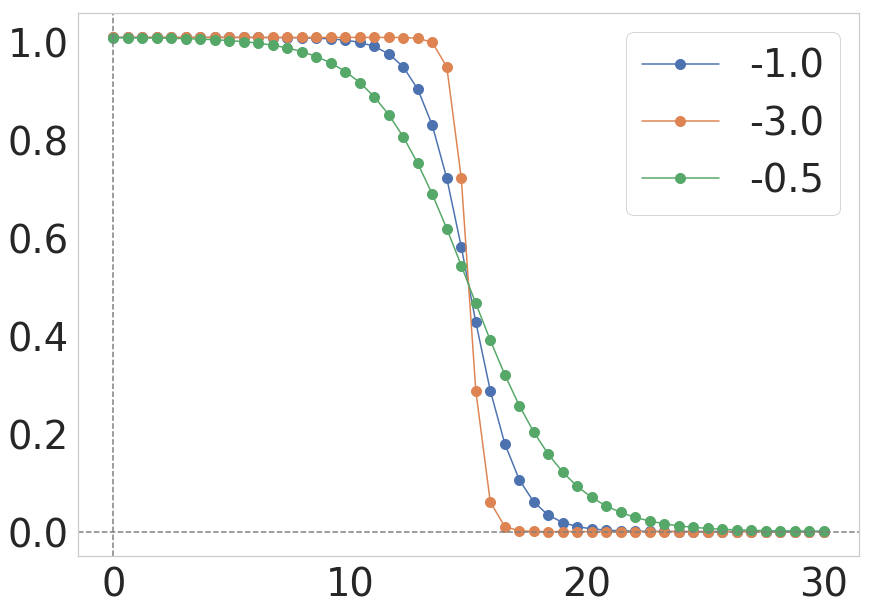

In [232]:
x = np.linspace(0, 30, num=50)
k = -1.0
sigma05 = 15.0
fig = plt.figure()
ax = fig.add_subplot(111)

k_set = [-1.0, -3.0, -0.5]
for k in k_set:
    y = return_sigmoid(x, k, sigma05)
    ax.plot(x, y, 'o-', ms=10, label=str(k))

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

## The variance for different values of p and n (samples)

In [233]:
def return_estimate_std(p, n):
    return  np.sqrt(p * (1 - p) / n)

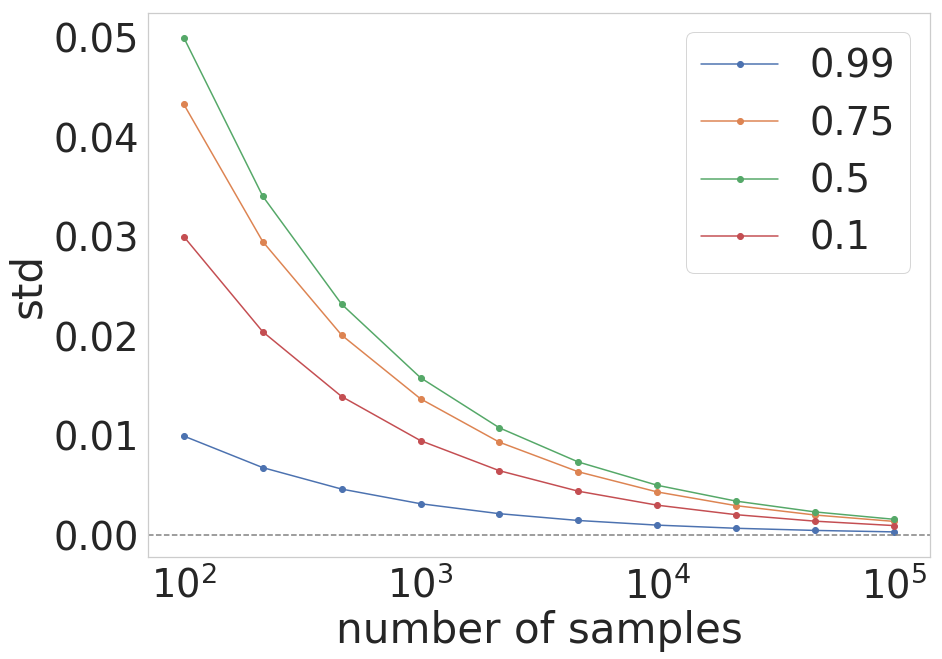

In [234]:
n = np.logspace(2, 5, num=10)
p_set = [0.99, 0.75, 0.5, 0.1]

fig = plt.figure()
ax = fig.add_subplot(111)

for p in p_set:
    stds = return_estimate_std(p, n)

    ax.semilogx(n, stds, 'o-', label=str(p))

ax.set_xlabel('number of samples')
ax.set_ylabel('std')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

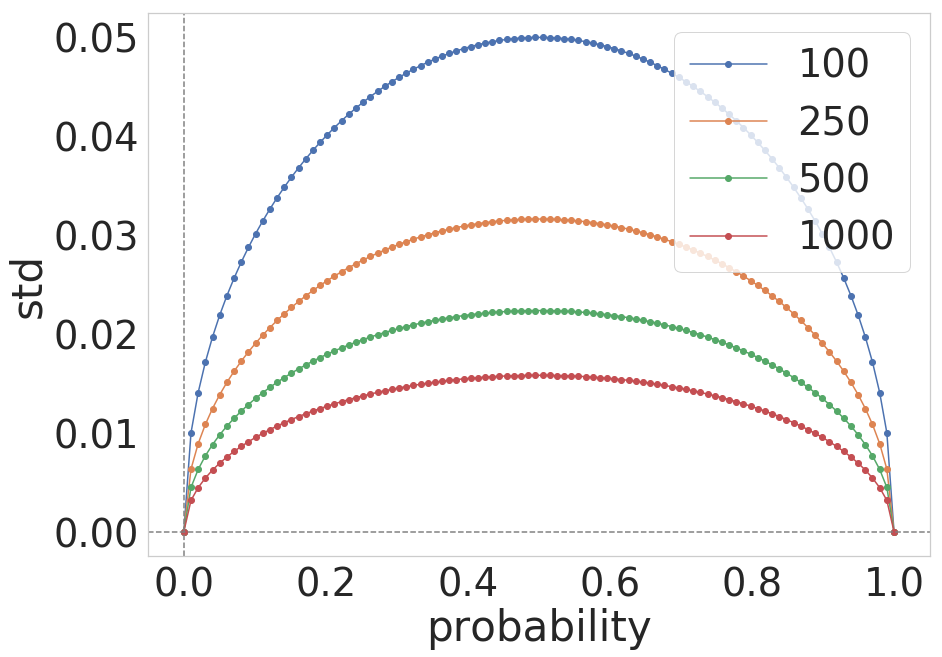

In [235]:
p = np.linspace(0, 1, num=100)

n_set = [100, 250, 500, 1000]

fig = plt.figure()
ax = fig.add_subplot(111)

for n in n_set:
    stds = return_estimate_std(p, n)

    ax.plot(p, stds, 'o-', label=str(n))

ax.set_xlabel('probability')
ax.set_ylabel('std')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

## Confidence intervals

In [236]:
import statsmodels.api as sm

No handles with labels found to put in legend.


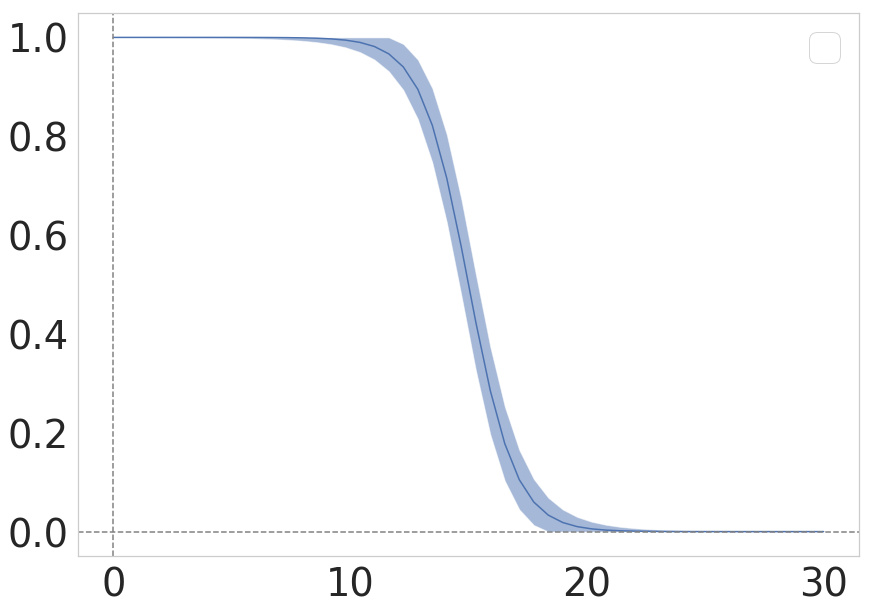

In [42]:
x = np.linspace(0, 30, num=50)
k = -1.0
sigma05 = 15.0

n = 100
y = return_sigmoid(x, k, sigma05)
succeses = n * y 
ci_low, ci_upp = sm.stats.proportion_confint(succeses, n, alpha=0.05, method='normal')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, y)
ax.fill_between(x, ci_low, ci_upp, alpha=0.5)

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

A comparison with different number of samples

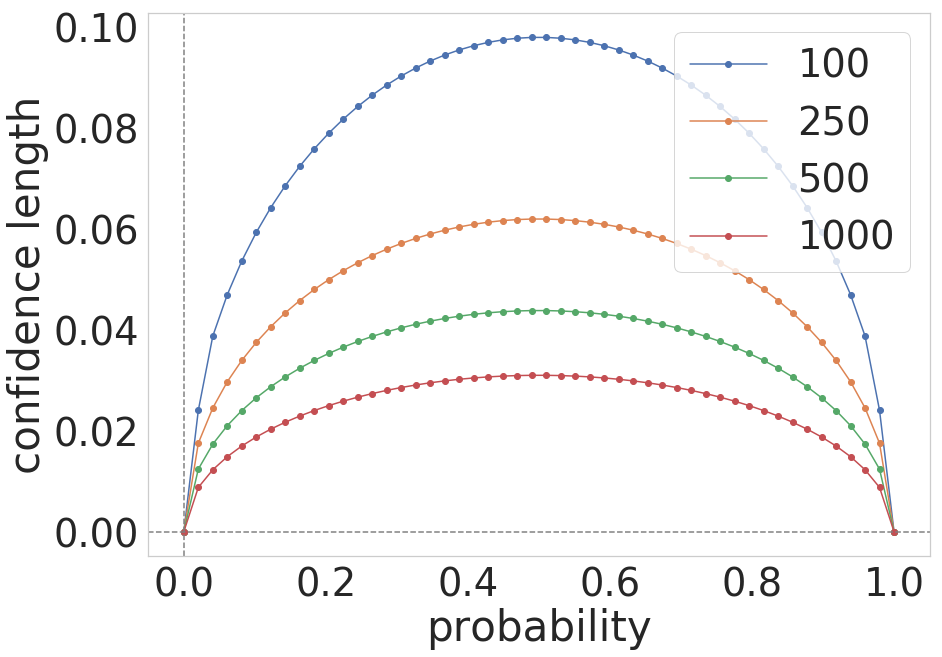

In [66]:
p = np.linspace(0, 1, num=50)
k = -1.0
sigma05 = 15.0

n_set = [100, 250, 500, 1000]
fig = plt.figure()
ax = fig.add_subplot(111)

for n in n_set:
    number_of_success = n * p
    ci_low, ci_upp = sm.stats.proportion_confint(number_of_success, n, alpha=0.05, method='normal')

    ax.plot(p, 0.5 * (ci_upp - ci_low), 'o-', label=str(n))

    ax.set_xlabel('probability')
ax.set_ylabel('confidence length')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

In [58]:
sm.stats.proportion_confint?

## Fitting a curve

### A simple example

In [267]:
%%time

strict_maximum = True

g_a = 1.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = minicolumns

# Training protocol
training_time_base = 0.300
training_times = [training_time_base for i in range(n_patterns)]
inter_pulse_interval_base = 0.0
inter_pulse_intervals = [inter_pulse_interval_base for i in range(n_patterns)]
inter_sequence_interval = 0.0
resting_time = 0.0
epochs = 1
T_persistence = 0.050

# Manager properties
dt = 0.001
values_to_save = ['o']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
             tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
             strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)

# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals, inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)

sigma_number = 200
samples = 25
sigma_max = 50

results_dictionary = run_sigma_sweep(sigma_number, samples, sigma_max, manager, T_persistence=T_persistence)

CPU times: user 1min 46s, sys: 12 ms, total: 1min 46s
Wall time: 1min 46s


In [270]:
from scipy.optimize import curve_fit
xdata = results_dictionary['sigma_vector'] 
ydata = results_dictionary['success'].mean(axis=1)
sigma = return_estimate_std(ydata, samples) + 0.1
p0 = [-3.0, nn.w[1, 1]  - nn.w[3, 1], 1.0]
popt, pcov = curve_fit(return_sigmoid, xdata, ydata, sigma=sigma, p0=p0)
perr = np.sqrt(np.diag(pcov))
print('values', popt)
print('errors', perr)

values [-0.1517  11.65787  1.26833]
errors [0.00905 0.78493 0.05451]


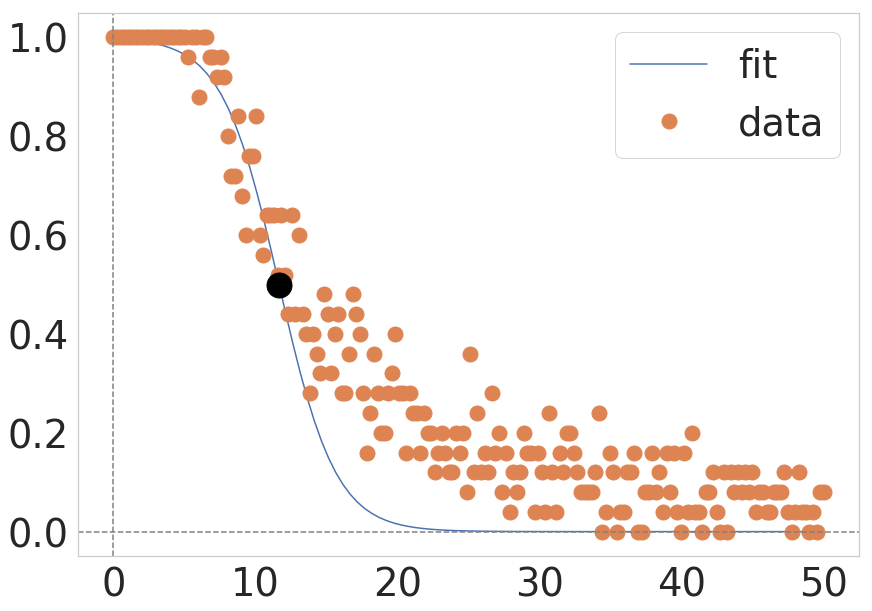

In [271]:
k, sigma05, L = popt

x = np.linspace(0, sigma_max, 100)
y = return_sigmoid(x, -0.5, sigma05, 1.0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, label='fit')
ax.plot(xdata, ydata, 'o', ms=ms, label='data')
ax.plot(sigma05, 0.5, 'o', ms=ms + 10, color='black')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

In [278]:
p0 = [-3.0, nn.w[1, 1]  - nn.w[3, 1]]
popt, pcov = curve_fit(return_sigmoid, xdata, ydata, p0=p0)
perr = np.sqrt(np.diag(pcov))
print('values', popt)
print('errors', perr)

values [-0.19549 14.56972]
errors [0.00929 0.26661]


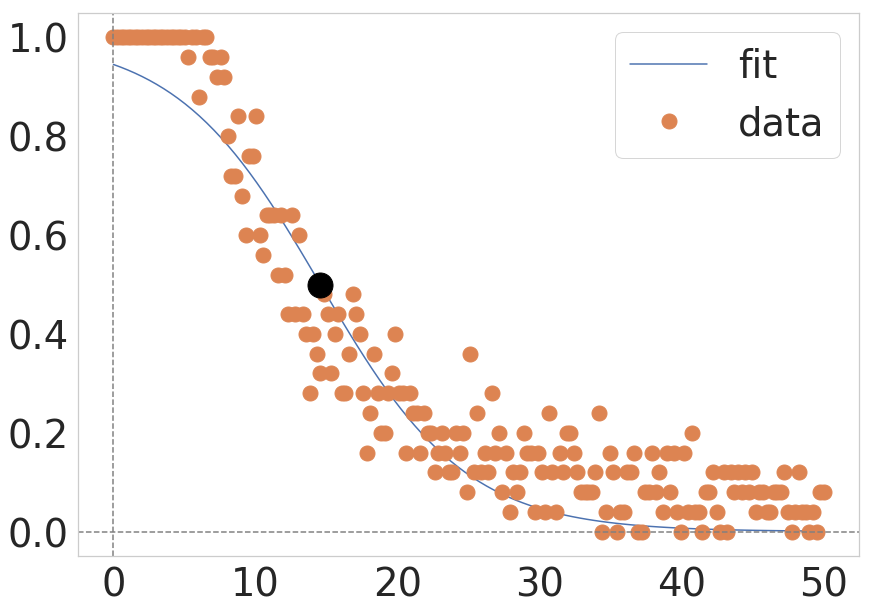

In [282]:
k, sigma05 = popt
x = np.linspace(0, sigma_max, 100)
y = return_sigmoid(x, k, sigma05)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, label='fit')
ax.plot(xdata, ydata, 'o', ms=ms, label='data') 
ax.plot(sigma05, 0.5, 'o', ms=ms + 10, color='black')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.legend();

In [297]:
%%time
T_recall = T_persistence * minicolumns
r = find_success_rate(manager, T_recall, n_samples=1000, sigma_out=sigma05)

CPU times: user 20.2 s, sys: 0 ns, total: 20.2 s
Wall time: 20.2 s


In [298]:
print(r, sigma05)

0.524 15.0


In [299]:
perr = np.sqrt(np.diag(pcov))

In [300]:
perr[1]

0.04285724469006773

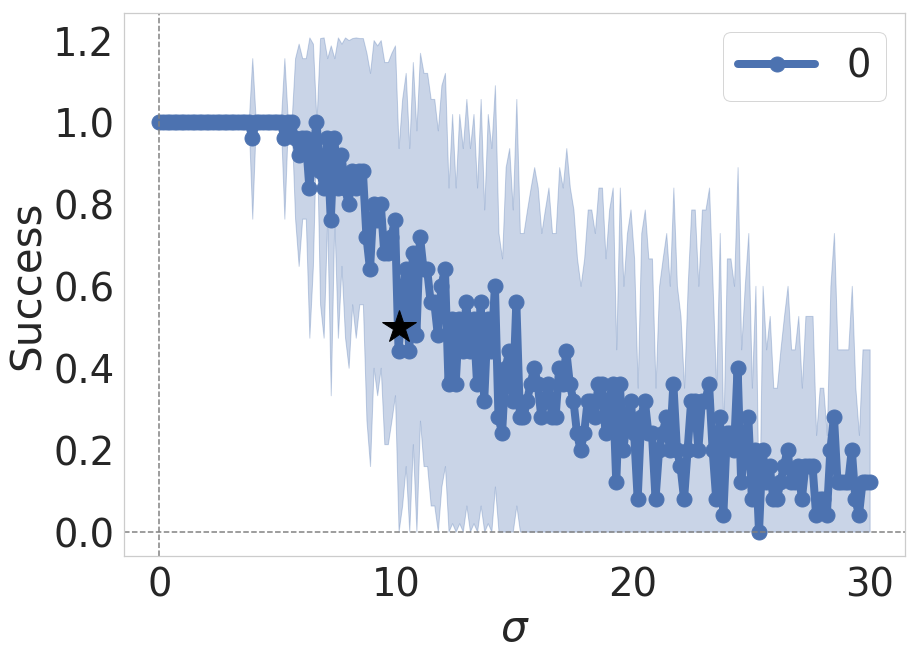

In [221]:
ax = plot_mean_success_vs_sigma(results_dictionary, index=0, label=0, ax=None)

### How many samples we need for estimation

In [176]:
indexes = np.arange(0, sigma_number)
xdata = results_dictionary['sigma_vector'] 
ydata = results_dictionary['success'].mean(axis=1)
test_array = np.arange(15, sigma_number, 1)
errors = []
values = []
p0 = [-3.0, nn.w[1, 1]  - nn.w[3, 1]]

for n in test_array:
    to_sample = np.random.choice(a=indexes, size=n)
    popt, pcov = curve_fit(return_sigmoid, xdata[to_sample], ydata[to_sample], p0=p0)
    perr = np.sqrt(np.diag(pcov))
    k, sigma05 = popt
    values.append(popt)
    errors.append(perr)
    
values = np.array(values)
errors = np.array(errors)

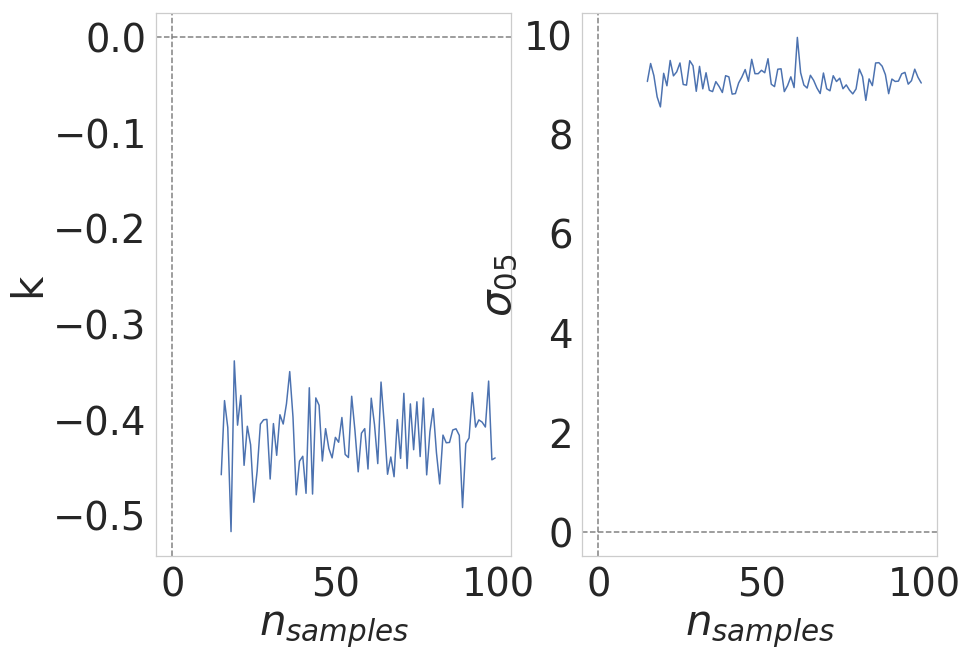

In [177]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(test_array, values[:, 0])

ax1.set_xlabel(r'$n_{samples}$')
ax1.set_ylabel('k')

ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')

ax2.plot(test_array, values[:, 1])

ax2.set_xlabel(r'$n_{samples}$')
ax2.set_ylabel(r'$\sigma_{05}$')

ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray')

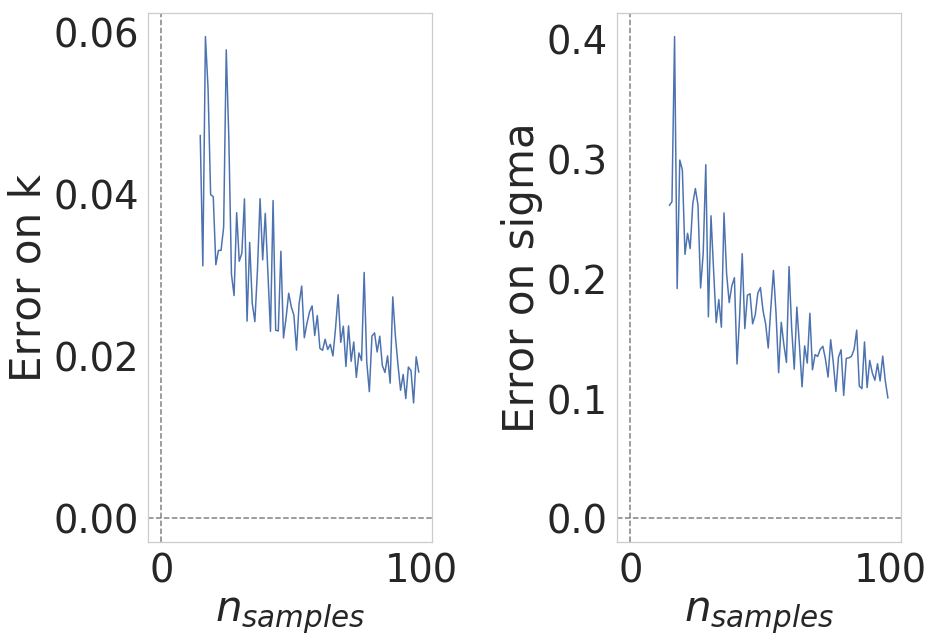

In [178]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(test_array, errors[:, 0])

ax1.set_xlabel(r'$n_{samples}$')
ax1.set_ylabel('Error on k')
ax1.axhline(0, ls='--', color='gray')
ax1.axvline(0, ls='--', color='gray')

ax2.plot(test_array, errors[:, 1])
ax2.set_xlabel(r'$n_{samples}$')
ax2.set_ylabel('Error on sigma')
ax2.axhline(0, ls='--', color='gray')
ax2.axvline(0, ls='--', color='gray')

fig.tight_layout()

### Fix the number of samples in time but increase the quality of them

In [ ]:
%%time

strict_maximum = True

g_a = 1.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = minicolumns

# Training protocol
training_time_base = 0.300
training_times = [training_time_base for i in range(n_patterns)]
inter_pulse_interval_base = 0.0
inter_pulse_intervals = [inter_pulse_interval_base for i in range(n_patterns)]
inter_sequence_interval = 0.0
resting_time = 0.0
epochs = 1
T_persistence = 0.050

# Manager properties
dt = 0.001
values_to_save = ['o']

# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
             tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
             strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
# Build the representation
representation = PatternsRepresentation(manager.canonical_activity_representation[:n_patterns],
                                        minicolumns=minicolumns)

# Build the protocol
protocol = Protocol()
protocol.simple_protocol(representation, training_times=training_times, inter_pulse_intervals=inter_pulse_intervals, inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Run the protocol
timed_input = manager.run_network_protocol_offline(protocol=protocol)

In [ ]:
sigma_number = 25

samples = np.arange(10, 110, 10)
samples = 100
sigma_max = 30

results_dictionary = run_sigma_sweep(sigma_number, samples, sigma_max, manager, T_persistence=T_persistence)

xdata = results_dictionary['sigma_vector'] 
ydata = results_dictionary['success'].mean(axis=1)
sigma = return_estimate_std(ydata, samples) + 0.1
p0 = [-3.0, nn.w[1, 1]  - nn.w[3, 1], 1.0]
popt, pcov = curve_fit(return_sigmoid, xdata, ydata, sigma=sigma, p0=p0)
perr = np.sqrt(np.diag(pcov))

k, sigma05 = popt

## Fitting in certain parts of logistic function

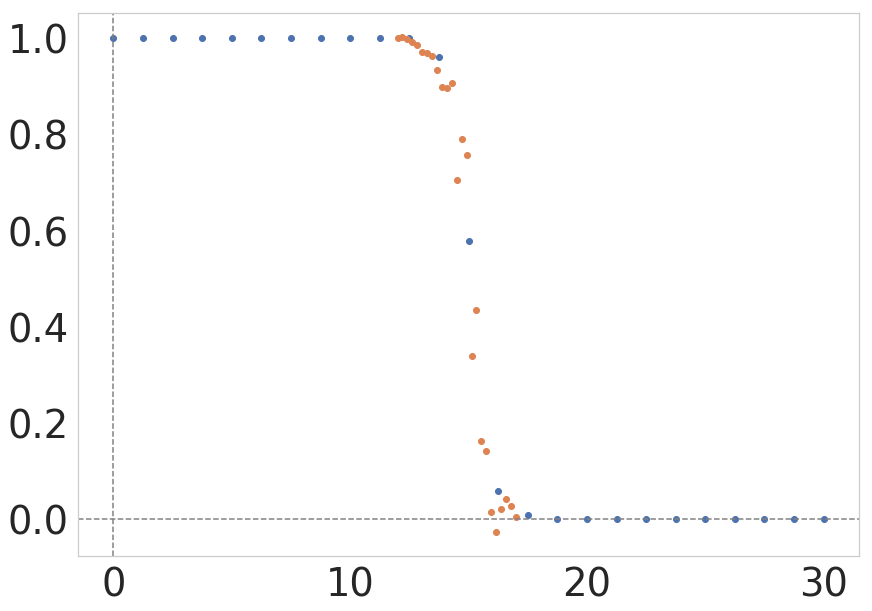

In [289]:
sampled_points = 25
x = np.linspace(0, 30, num=sampled_points)
n_samples = 20
k = -3.0
sigma05 = 15.0
fig = plt.figure()
ax = fig.add_subplot(111)

central_points = np.linspace(12, 17, sampled_points) 

y = return_sigmoid(x, k, sigma05)
y += return_estimate_std(y, n_samples) * np.random.randn(y.size)

y_central = return_sigmoid(central_points, k, sigma05)
y_central += return_estimate_std(y_central, n_samples) * np.random.randn(y_central.size)

ax.plot(x, y, 'o')
ax.plot(central_points, y_central, 'o')


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

In [290]:
xdata = x
ydata = y
popt, pcov = curve_fit(return_sigmoid, xdata, ydata)
perr = np.sqrt(np.diag(pcov))
print('values', popt)
print('errors', perr)

values [-2.40489 15.12726]
errors [0.02047 0.00293]


In [291]:
xdata = central_points
ydata = y_central
popt, pcov = curve_fit(return_sigmoid, xdata, ydata)
perr = np.sqrt(np.diag(pcov))
print('values', popt)
print('errors', perr)

values [-2.73502 15.07448]
errors [0.28242 0.04286]
